In [1]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
from matplotlib import pyplot as plt

# import pickle to save image data
import pickle

# to use all cpu cores we use Pool from multiprocessing
from multiprocessing import Pool

## load data details

In [2]:
ground_truth_df = None
duplicate_images_df = None

with open( os.path.join('.', 'ISIC_2020_Training_GroundTruth_v2.csv') ) as fd:
    ground_truth_df = pd.read_csv(fd, encoding='utf8')

with open( os.path.join('.', 'ISIC_2020_Training_Duplicates.csv')) as fd:
    duplicate_images_df = pd.read_csv(fd, encoding='utf8')

## helper functions

In [3]:
def scale_img(img_data, height=240, width=320):
    dim = (width, height)
    new_img = cv.resize(img_data, dim)
    return new_img

def change_color_rgb_to_gray(img_data):
    gray = cv.cvtColor(img_data, cv.COLOR_RGB2GRAY)
    return gray

def gray_scale_img(img_data):
    gray = change_color_rgb_to_gray(img_data)
    return scale_img(gray)

def load_img(image_name):
    return cv.imread(os.path.join('.', 'images', f"{image_name}.jpg"))

## drop duplicate images

In [4]:
ground_truth_df = ground_truth_df.set_index('image_name').drop(index=duplicate_images_df['image_name_2']).reset_index()

## save images to numpy array 

### scale down images to `height=240`, `width=320` and load them into tuple list `[(img_name, img_data)]`

(240, 320, 3)


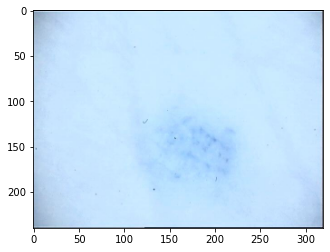

In [5]:
image_name = 'ISIC_8924942'
img = cv.imread(os.path.join('.', 'images', f"{image_name}.jpg"))
plt.imshow(scale_img(img))
print(scale_img(img).shape)

In [7]:
def scale_load(img_name):
    return (img_name, scale_img(load_img(img_name)))

with Pool(16) as p:
    image_data = p.map(scale_load, ground_truth_df['image_name'])

### create dataframe with image data

In [8]:
image_data_df = [[img_name, data] for img_name, data in image_data]

# save image_data_df if necessary

# open a file where data need to be stored
#file = open('image_data_df.pkl', 'wb')
# dump information to the file
#pickle.dump(image_data_df, file)
# close the file
#file.close()

In [9]:
images_df = pd.DataFrame(image_data_df, columns=['image_name', 'image_data'])

In [10]:
images_df.head(1)

,image_name,image_data
0,ISIC_2637011,"[[[153, 136, 179], [147, 134, 180], [175, 151,..."


### join dataframe with `ground_truth` details

In [11]:
dataset_df = pd.merge(ground_truth_df, images_df, left_on='image_name', right_on='image_name')
dataset_df.head(2)

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,image_data
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0,"[[[153, 136, 179], [147, 134, 180], [175, 151,..."
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0,"[[[46, 80, 146], [71, 100, 155], [78, 99, 158]..."


In [12]:
dataset_df.to_pickle('dataset_df.pickle')

## load dataframe if starting notebook

In [6]:
dataset_df = pd.read_pickle('dataset_df.pickle')

In [7]:
dataset_df.head(2)

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,image_data
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0,"[[[150, 133, 176], [153, 141, 186], [187, 159,..."
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0,"[[[45, 80, 145], [72, 99, 155], [76, 99, 161],..."
